252
0
0
252


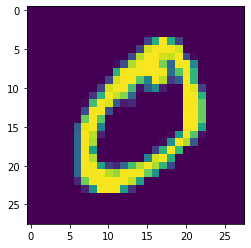

In [22]:
#Ex. 18 How PC see imgages
# Using MNIST dataset which contains a repository of hand-written digits
%matplotlib inline
import keras
import matplotlib.pyplot as plt
# Import training & test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Visualize the 1st image in the dataset
sample_image = X_train[0]
sample_image = X_train[1]
plt.imshow(sample_image)
# a pic 28x28 pixels, each pixel is a number [0:255]
print(sample_image[22][11])
print(sample_image[6][12])
print(sample_image[5][23])
print(sample_image[10][11])

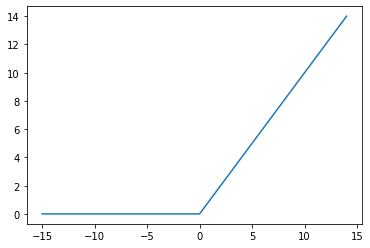

In [7]:
#Ex. 19. Visualizing ReLU
from matplotlib import pyplot

#define ReLu function 
def relu(x):
    return max(0.0, x)

# specify input and output 
inputs = [x for x in range(-15,15)]
outputs = [relu(x) for x in inputs]

#Plot the input against the output 
pyplot.plot(inputs,outputs)
pyplot.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                46090     
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
__________________________________________________

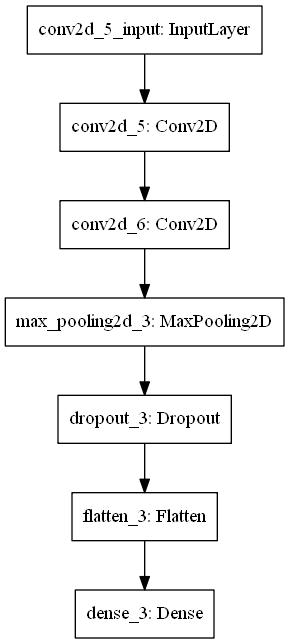

In [8]:
# Ex 20: Creating a Simple CNN Architecture. 
from keras.models import Sequential #For stacking layers
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import plot_model
import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
os.environ["PATH"] += os.pathsep + 'E:/CysecLab/NLP_PracticesForDeepLearning/virtual_env/Lib/site-packages/graphviz-2.38/release/bin'
#Define the variabls used 
num_classes = 10
# Define the model, Keras's Sequential model allows us to stack layers as
model = Sequential()
############################### ADD Section one's layers ####################################
# The Conv and ReLU layers are defined together. Kernel size is 3 for each
# 1st layer of model receive input (as input in form of 28 by 28 images), 64 neurons for 1st layer, and 32 for 2nd layer, these are HYPERPARAMETERS that can be optimized
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu', ))

#pooling layer and a dropout layer with 25%
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
###### FINISED SECTION ONE -  number of layers are hyperparameters that can be optimized ######

### SECTION 2: 1.Flatten the input 2. Add a Fully connected / Dense layer. Activation: Softmax
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()
# export model image
plot_model(model,to_file='model.png')


In [14]:
#Ex 21:  Training CNN
#1. Define number of epochs (One is when entire data set is passed through a complete forward and backward). Training data can be divided to several batches
epochs = 12
#2 Import MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#3 Reshape data to fit our model, 28x28 is shape of each image, 1 signifies that the images are grayscale 
X_train = X_train.reshape(60000,28,28,1) # 60000 is the number of traning examples
X_test = X_test.reshape(10000,28,28,1) # 10000 is the number of test examples
#4. to_categorical function changes a vectors of Integers to onehot encoded vector, the func returns the array shown. 
import numpy as np
from keras.utils import to_categorical
example = [1,0,3,2]
to_categorical(example)
# apply it to the target 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Define the loss function, optimizer and metrics. Adam (Adaptive Moment) is the algorithm for stochastic Gradient Descent. It defines an adaptive learning rate for each parameter
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
# train the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs)

#8. Evaluate performace of model 
score = model.evaluate(X_test,y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2848 - accuracy: 0.9396 - val_loss: 0.0761 - val_accuracy: 0.9749
Epoch 2/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0958 - accuracy: 0.9712 - val_loss: 0.0575 - val_accuracy: 0.9813
Epoch 3/12
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.0587 - val_accuracy: 0.9823
Epoch 4/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0646 - accuracy: 0.9800 - val_loss: 0.0634 - val_accuracy: 0.9812
Epoch 5/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0538 - accuracy: 0.9833 - val_loss: 0.0562 - val_accuracy: 0.9823
Epoch 6/12
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 7/12
60000/60000 [==============================] - 74s 1ms/st

In [24]:
from keras.utils import to_categorical
example = [1,0,3,2]
to_categorical(example)
# apply it to the target 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#check image shape. By default,every image in the mnist dataset is 28 x 28, 1 means that image is grayscale
print(X_train[0].shape)
#check the one-hot-encoded fuction 
print(y_train[0])
# ouput: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] the first image is 5, is bit 5 = 1. 
print(y_train[1])
#ouput: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] the first image is 0, is bit 0 = 1. 

(28, 28)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
# Excercise 22. Application of a Simple CNN to a Reuters News Topc for Classification
#. Import necessary classes
import keras
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
from keras.utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

#2. Define variables 
Batch_size = 32
Epochs = 12
Maxlen = 10000
Embedded_Dim = 128 
Num_filters = 64
Kernel_Size = 5 

#3. Load Reuters data set
(X22_train, y22_train), (X22_test, y22_test) = reuters.load_data(num_words=None, test_split=0.2)

#4. Prepare data
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_classes = max(y22_train) + 1
index_to_word = {}
for key, value in word_index.items():
    index_to_word[value] = key 

#5. Tokenize input data 
tokenizer = Tokenizer(num_words=Maxlen)
X22_train = tokenizer.sequences_to_matrix(X22_train, mode='binary')
X22_test = tokenizer.sequences_to_matrix(X22_test, mode='binary')
from keras.utils import to_categorical
y22_train = to_categorical(y22_train, num_classes)
y22_test = to_categorical(y22_test, num_classes)

#6. Define the model:
MODEL = Sequential()
MODEL.add(layers.Embedding(512,Embedded_Dim, input_length = Maxlen))
MODEL.add(layers.Conv1D(Num_filters, Kernel_Size, activation ='relu' ))
MODEL.add(layers.GlobalMaxPooling1D())
MODEL.add(layers.Dense(10, activation='relu'))
MODEL.add(layers.Dense(num_classes, activation='softmax'))
MODEL.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MODEL.summary()
# export model image
plot_model(MODEL,to_file='REUTERS.png')
#7. Train and evaluate the model.Print 
History = MODEL.fit(X22_train, y22_train, batch_size=Batch_size, epochs=Epochs, verbose=1, validation_split=0.1)
Score = MODEL.evaluate(X22_test,y22_test,batch_size=Batch_size, verbose=1)

print('Test Loss: ', Score[0])
print('Test Accuracy: ', Score[1])



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10000, 128)        65536     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9996, 64)          41024     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_4 (Dense)              (None, 46)                506       
Total params: 107,716
Trainable params: 107,716
Non-trainable params: 0
_________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/12
8083/8083 [==============================] - 200s 25ms/s